In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from toskipornot.features.analyze_features import *

root_dir = "/Users/amithkamath/repo/toskipornot"
report_path = os.path.join(root_dir, "reports", "synthetic-robustness")

for_10_only = True

/Users/amithkamath/opt/anaconda3/envs/geomvar-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
if for_10_only:
    agunet_noskip_data = pd.read_csv(os.path.join(report_path, "agunet-noskipunet-ratios-10-only.csv"), header=None)
    unet_noskip_data = pd.read_csv(os.path.join(report_path, "unet-noskipunet-ratios-10-only.csv"), header=None)
else:
    agunet_noskip_data = pd.read_csv(os.path.join(report_path, "agunet-noskipunet-ratios.csv"), header=None)
    unet_noskip_data = pd.read_csv(os.path.join(report_path, "unet-noskipunet-ratios.csv"), header=None)

In [4]:
agunet_noskip = pd.Series(np.diag(agunet_noskip_data), index=[agunet_noskip_data.index, agunet_noskip_data.columns])
agunet_noskip = agunet_noskip.iloc[::-1]

unet_noskip = pd.Series(np.diag(unet_noskip_data), index=[unet_noskip_data.index, unet_noskip_data.columns])
unet_noskip = unet_noskip.iloc[::-1]

In [5]:
data_path = os.path.join(root_dir, "data", "foreground-processed")

if for_10_only:
    blend_ratios = [90, 80, 70, 60, 50, 40, 30, 20, 10]
else:
    blend_ratios = [98, 95, 92, 90, 88, 85, 82, 80, 70, 60, 50, 40, 30, 20, 10]


distance_for_ratio = []
for blend_ratio in blend_ratios:
    blend_path = os.path.join(
        data_path, "alphablend_0p" + str(blend_ratio) + "_normal"
    )
    images_path = os.path.join(blend_path, "train")
    images = sorted(glob(os.path.join(images_path, "*.png")))

    labels_path = os.path.join(blend_path, "mask")
    labels = sorted(glob(os.path.join(labels_path, "*.png")))

    distance_scores = run_lbp_analysis(images, labels)
    distance_for_ratio.append(np.mean(distance_scores))

100%|██████████| 100/100 [00:01<00:00, 59.66it/s]


(0.005, 0.5)

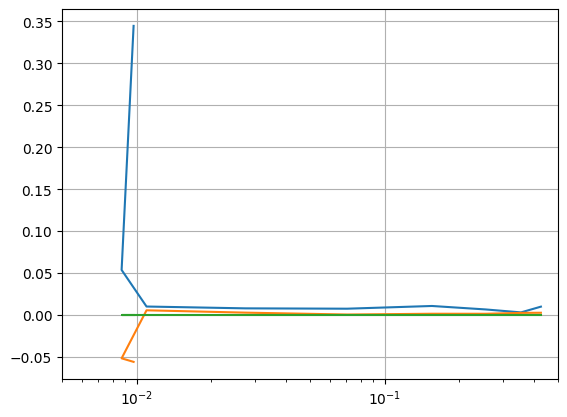

In [6]:
plt.plot(distance_for_ratio, agunet_noskip)
plt.plot(distance_for_ratio, unet_noskip)
if for_10_only:
    plt.plot(distance_for_ratio, [0] * 9) # for NoSkipUNet
else:
    plt.plot(distance_for_ratio, [0] * 15) # for NoSkipUNet
plt.xscale("log")
plt.grid()
plt.xlim(5e-3, 5e-1)

(0.01, 1.0)

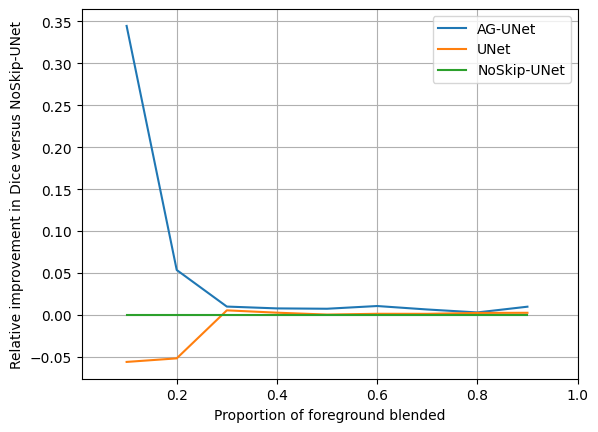

In [8]:
#blend_ratios = blend_ratios[::-1]
blend_ratio_rev = [(100 - i)/100 for i in blend_ratios]
plt.plot(blend_ratio_rev, agunet_noskip)
plt.plot(blend_ratio_rev, unet_noskip)
if for_10_only:
    plt.plot(blend_ratio_rev, [0] * 9) # for NoSkipUNet
else:
    plt.plot(blend_ratio_rev, [0] * 15) # for NoSkipUNet
#plt.xscale("log")
plt.grid()
plt.legend(("AG-UNet", "UNet", "NoSkip-UNet"))
plt.xlabel("Proportion of foreground blended")
plt.ylabel("Relative improvement in Dice versus NoSkip-UNet")
plt.xlim(1e-2, 1)